In [40]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML1.csv", parse_dates =["timestamp"])

count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

df.head()

Number of rows: 13588472
Number of columns: 11


,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
0,2020-07-16 00:00:00.024000+00:00,NaN,NaN,12.0,NaN,17.0,NaN,NaN,NaN,15091.0,NaN
1,2020-07-16 00:00:00.026000+00:00,1548.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2,2020-07-16 00:00:00.134000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,14695.0,NaN
3,2020-07-16 00:00:00.135000+00:00,1550.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
4,2020-07-16 00:00:00.236000+00:00,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,15082.0,NaN


In this case I am going to used the Keypad pressed variable by removing all the missing values from it and then interpolating the variables with missing values in the variable AnalogNoiseSensor.noiseTotal to use it to do my prediction. I am assuming that all the values from the keypad was actually pressed in the process of brewing coffee. 

In [42]:
# Drop rows with any NaN in the selected Keypad.keyPressed only
df1 = df.dropna(how='all', subset=['Keypad.keyPressed'])
df1

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
452963,2020-07-16 05:36:05.336000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452966,2020-07-16 05:36:05.387000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452967,2020-07-16 05:36:05.437000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452970,2020-07-16 05:36:05.488000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452971,2020-07-16 05:36:05.538000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12825954,2020-07-22 14:34:40.315000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12825957,2020-07-22 14:34:40.369000+00:00,1561.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,3.0
12825958,2020-07-22 14:34:40.420000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12825961,2020-07-22 14:34:40.480000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0


In [43]:
df1.isnull().sum()

timestamp                                         0
AnalogVibrationSensor.vibrationTotal           1794
TemperatureAndHumiditySensor.humidity          2295
AnalogNoiseSensor.noiseDiff                    2292
TemperatureAndHumiditySensor.temperature       2295
AnalogNoiseSensor.noiseRange                   2290
AnalogVibrationSensor.vibrationDiff            1774
AnalogVibrationSensor.vibrationRange           1753
VibrationThresholdSensor.vibrationThreshold    1619
AnalogNoiseSensor.noiseTotal                   2292
Keypad.keyPressed                                 0
dtype: int64

In [44]:
df1.shape[0]

2302

In [45]:
df2 = df1.drop_duplicates(["timestamp"])
df2.shape[0]

2302

In [46]:
X, X1 = df2.drop(['AnalogNoiseSensor.noiseTotal'], axis=1),df2['AnalogNoiseSensor.noiseTotal']
X

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,Keypad.keyPressed
452963,2020-07-16 05:36:05.336000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452966,2020-07-16 05:36:05.387000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452967,2020-07-16 05:36:05.437000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452970,2020-07-16 05:36:05.488000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
452971,2020-07-16 05:36:05.538000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
12825954,2020-07-22 14:34:40.315000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12825957,2020-07-22 14:34:40.369000+00:00,1561.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,3.0
12825958,2020-07-22 14:34:40.420000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12825961,2020-07-22 14:34:40.480000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0


In [47]:
X2 = X1.interpolate(method='linear', axis=0).ffill().bfill()
X2

452963      13565.0
452966      13565.0
452967      13565.0
452970      13565.0
452971      13565.0
             ...   
12825954    15024.0
12825957    15024.0
12825958    15024.0
12825961    15024.0
12825962    15024.0
Name: AnalogNoiseSensor.noiseTotal, Length: 2302, dtype: float64

In [55]:
X3 = pd.concat([X, X2], axis=1)
X3

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,Keypad.keyPressed,AnalogNoiseSensor.noiseTotal
452963,2020-07-16 05:36:05.336000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13565.0
452966,2020-07-16 05:36:05.387000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13565.0
452967,2020-07-16 05:36:05.437000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13565.0
452970,2020-07-16 05:36:05.488000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13565.0
452971,2020-07-16 05:36:05.538000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13565.0
...,...,...,...,...,...,...,...,...,...,...,...
12825954,2020-07-22 14:34:40.315000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,15024.0
12825957,2020-07-22 14:34:40.369000+00:00,1561.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,3.0,15024.0
12825958,2020-07-22 14:34:40.420000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,15024.0
12825961,2020-07-22 14:34:40.480000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,15024.0


In [56]:
X3.mean()

AnalogVibrationSensor.vibrationTotal            1561.816929
TemperatureAndHumiditySensor.humidity             37.375000
AnalogNoiseSensor.noiseDiff                        6.900000
TemperatureAndHumiditySensor.temperature          30.736607
AnalogNoiseSensor.noiseRange                      15.500000
AnalogVibrationSensor.vibrationDiff                0.191288
AnalogVibrationSensor.vibrationRange               1.961749
VibrationThresholdSensor.vibrationThreshold        0.929722
Keypad.keyPressed                                  2.048219
AnalogNoiseSensor.noiseTotal                   15027.070156
dtype: float64

In [58]:
import plotly.express as px
fig = px.line(X3, x='timestamp',y = 'AnalogNoiseSensor.noiseTotal',title= 'timestamp vs AnalogNoiseSensor.noiseTotal with slider')

fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 day", step="day", stepmode="backward"),
            dict(count=2, label="4 day", step="day", stepmode="backward"),
            dict(count=3, label="7 day", step="day", stepmode="backward"),
            dict(step="all")
        ])
     )
)
fig.show()

In [14]:
df3=df2.set_index('timestamp')
df3

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:36:05.336000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-16 05:36:05.387000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-16 05:36:05.437000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-16 05:36:05.488000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-16 05:36:05.538000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 14:34:40.315000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2020-07-22 14:34:40.369000+00:00,1561.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,3.0
2020-07-22 14:34:40.420000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
df3.index

In [16]:
X_1, y_1 = df3.drop(['Keypad.keyPressed'], axis=1), df3['Keypad.keyPressed']
X_1.head()

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:36:05.336000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16 05:36:05.387000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16 05:36:05.437000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16 05:36:05.488000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16 05:36:05.538000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
X_2 = X_1.interpolate(method='time', axis=0).ffill().bfill()
X_2

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:36:05.336000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0
2020-07-16 05:36:05.387000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0
2020-07-16 05:36:05.437000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0
2020-07-16 05:36:05.488000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0
2020-07-16 05:36:05.538000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0
...,...,...,...,...,...,...,...,...,...
2020-07-22 14:34:40.315000+00:00,1562.63636,37.1875,3.0,30.09375,8.0,0.163636,2.0,1.0,15024.0
2020-07-22 14:34:40.369000+00:00,1561.00000,37.1875,3.0,30.09375,8.0,0.000000,2.0,1.0,15024.0
2020-07-22 14:34:40.420000+00:00,1561.00000,37.1875,3.0,30.09375,8.0,0.000000,2.0,1.0,15024.0


In [18]:
X_2.mean()

AnalogVibrationSensor.vibrationTotal            1561.661874
TemperatureAndHumiditySensor.humidity             37.386003
AnalogNoiseSensor.noiseDiff                        8.334255
TemperatureAndHumiditySensor.temperature          30.208499
AnalogNoiseSensor.noiseRange                      13.880055
AnalogVibrationSensor.vibrationDiff                0.173583
AnalogVibrationSensor.vibrationRange               1.944394
VibrationThresholdSensor.vibrationThreshold        0.936590
AnalogNoiseSensor.noiseTotal                   15076.165896
dtype: float64

In [20]:
df_merge = pd.concat([X_2, y_1], axis=1)
df_merge

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:36:05.336000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0,1.0
2020-07-16 05:36:05.387000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0,1.0
2020-07-16 05:36:05.437000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0,1.0
2020-07-16 05:36:05.488000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0,1.0
2020-07-16 05:36:05.538000+00:00,1545.00000,37.3750,12.0,29.84375,17.0,0.000000,2.0,1.0,13565.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 14:34:40.315000+00:00,1562.63636,37.1875,3.0,30.09375,8.0,0.163636,2.0,1.0,15024.0,3.0
2020-07-22 14:34:40.369000+00:00,1561.00000,37.1875,3.0,30.09375,8.0,0.000000,2.0,1.0,15024.0,3.0
2020-07-22 14:34:40.420000+00:00,1561.00000,37.1875,3.0,30.09375,8.0,0.000000,2.0,1.0,15024.0,3.0


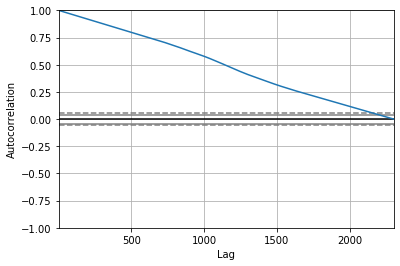

In [34]:
from pandas.plotting import autocorrelation_plot

plt.figure()


spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)

df_1= pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

autocorrelation_plot(df_merge)

This is another indication that something is wrong with this appraoch from the Autocorrelation plot.

In [21]:
# Extracting the column  AnalogNoiseSensor.noiseTotal 
df_merge1 = df_merge['AnalogNoiseSensor.noiseTotal']
df_merge1.head()

timestamp
2020-07-16 05:36:05.336000+00:00    13565.0
2020-07-16 05:36:05.387000+00:00    13565.0
2020-07-16 05:36:05.437000+00:00    13565.0
2020-07-16 05:36:05.488000+00:00    13565.0
2020-07-16 05:36:05.538000+00:00    13565.0
Name: AnalogNoiseSensor.noiseTotal, dtype: float64

In [29]:
va = df_merge1.to_frame()
va

,AnalogNoiseSensor.noiseTotal
timestamp,
2020-07-16 05:36:05.336000+00:00,13565.0
2020-07-16 05:36:05.387000+00:00,13565.0
2020-07-16 05:36:05.437000+00:00,13565.0
2020-07-16 05:36:05.488000+00:00,13565.0
2020-07-16 05:36:05.538000+00:00,13565.0
...,...
2020-07-22 14:34:40.315000+00:00,15024.0
2020-07-22 14:34:40.369000+00:00,15024.0
2020-07-22 14:34:40.420000+00:00,15024.0


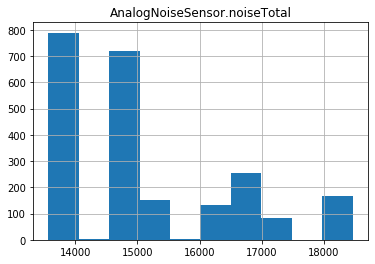

In [39]:
from matplotlib import pyplot
va.hist()
pyplot.show()

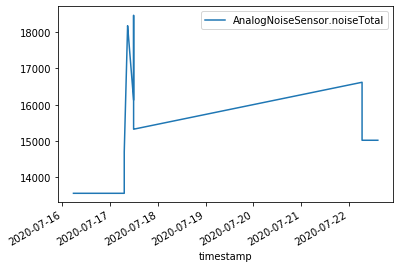

In [31]:
va.plot()

I stopped using this approach based on the visual as it could not give me a sustained period when something was brewed or any significant noise increase.